<a href="https://colab.research.google.com/github/AraiKensuke/LOST/blob/master/FitExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#########  clone and install necessary packages from github repositories

import sys
import importlib

if importlib.util.find_spec("pyPG") is None:
  !git clone https://github.com/AraiKensuke/pyPG.git
  %cd /content/pyPG/
   ###  pyPG is written in C++/python, and uses the C library GNU Scientific Library.  
  !sudo apt-get install libgsl-dev    
  !python setup.py build_ext --inplace


!git clone https://github.com/AraiKensuke/ka_tools.git




In [ ]:
if importlib.util.find_spec("LOST") is None:
  %cd /content
  !git clone https://github.com/AraiKensuke/LOST.git
  %cd /content/LOST

  !python setup.py build_ext --inplace

sys.path.insert(1, "/content/LOST")    #  add these to searchpath for python modules
sys.path.insert(1, "/content/pyPG")    #  add these to searchpath for python modules
%cd ..


#from google.colab import files
#uploaded = files.upload()

In [ ]:
"""
Template to invoke Latent Oscillation in Spike Train (LOST) model

There are 
"""

import numpy as _N
import os 
import LOST.mcmcARp_ram as _mARp
import ka_tools.filetools as _katft
import inspect

#########    
import LOST.exampledat.ex1 as exmp
spkdatfn="ex1"
basespkdatfn=spkdatfn
_katft.make_deep_directory("DATA/%s"  % basespkdatfn)
spkdatpath="DATA/%s/spk_dat.dat"  % basespkdatfn

_N.savetxt(spkdatpath, exmp.spk_dat, fmt="%d")

runlabel = 1
outdir="OUT/%(bsd)s%(rl)d" % {"bsd" : basespkdatfn, "rl" : runlabel}
_katft.make_deep_directory(outdir)
#########

myfn = inspect.getfile(inspect.currentframe())
os.system("cp %(myfn)s %(outdir)s/runLost.py" % {"myfn" : myfn, "outdir" : outdir})

###################  params and settings
bRealDat         = False      #  is our data real data <lfp> <fltrd> <spk 0 1>
pkldSmpls        = "smplsN.dump"   #  last Gibbs samples, pickled for continuation
postModes        = None       #  MAP estimate of parameters
dontrun          = False      #  just construct mARp from pickle

tr0 = 0
tr1 = 5
nwpr= "wp"
R   = 1
CnpCs = 3
__exec_base_fn__ = inspect.getfile(inspect.currentframe())[0:-3]
#nwpr, tr0, tr1, CnpCs, R = pF.parseFN(__exec_base_fn__)
Cn               = CnpCs - 1

mARp = _mARp.mcmcARp()
if nwpr == "wp":
    mARp.sig_ph0H =-(0.97*0.97)

mARp.mcmcRunDir = outdir
mARp.burn     = 1000
mARp.ITERS    = 10000
mARp.NMC      = 0
mARp.peek     = 200
mARp.model    = "bernoulli"
mARp.t0       = 0
mARp.t1       = 1500
mARp.ID_q2    = False
mARp.bpsth    = True
#mARp.dohist   = False
mARp.dt       = 0.001
mARp.histFN   = ""
mARp.ifs      = [(0.3 / mARp.fSigMax) * _N.pi]    #  initial values
mARp.Cn       = Cn
mARp.R        = R
mARp.knownSigFN= None
mARp.xknownSig=0.9
mARp.BsmpxSkp = 10
mARp.doBsmpx  = True
mARp.noAR     = False
mARp.processes= 1
mARp.downsamp = True

mARp.run(spkdatpath, outdir, trials=_N.arange(tr0, tr1), runlatent=False, dontrun=False)
    
#plotFsAmp(mARp, dir=__exec_base_fn__)
#mARp.dump_smps(mARp.burn, dir=outdir)



DATA
DATA/ex1
OUT
OUT/ex11
20
-----  1  3  8  13  21
-----  1  3  8  13  21   (overridden?)
0.047123889803846894
0.06283185307179587
[-0.4       +0.j          0.96999828+0.00182841j  0.96999828-0.00182841j
  0.49594675+0.02338826j  0.49594675-0.02338826j  0.53533826+0.03368063j
  0.53533826-0.03368063j]
R  [-0.40, ..]
C  [ 0.97,  0.001]
C  [ 0.50,  0.015]
C  [ 0.54,  0.020]
[163.51303186 223.73662906 289.47745639 403.93736978]
readSmpls   
****!!!!!!!!!!!!!!!!  dohist  True
oo.mcmcRunDir    OUT/ex11
^^^^^^   allocateSmp  10000
-----------    histknots 10
it: 200    mnStd  1.157
it: 400    mnStd  2.332


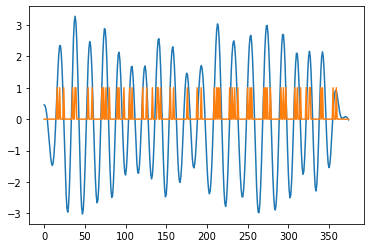

In [10]:
import matplotlib.pyplot as _plt
_plt.plot(_N.mean(mARp.Bsmpx[0, 2800:, 2:], axis=0))
_plt.plot(mARp.y[0])

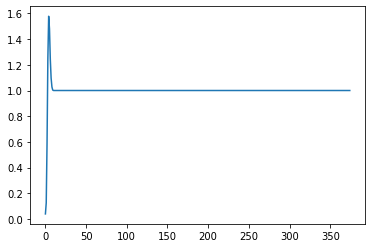

In [18]:
_plt.plot(_N.exp(_N.mean(mARp.smp_hist[:, 28000:], axis=1)))


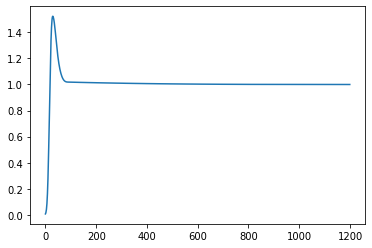

In [20]:
_plt.plot(exmp.lmbd)